# Introduction to Regression with Neural Network in TensorFlow

There are many definition for a regression problem but in our case, we're going to simplfy it: prediction a numerical variable based on combination of other variables. Even shorter, predicting a number...

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

2.11.0


## Creating data to view and fit

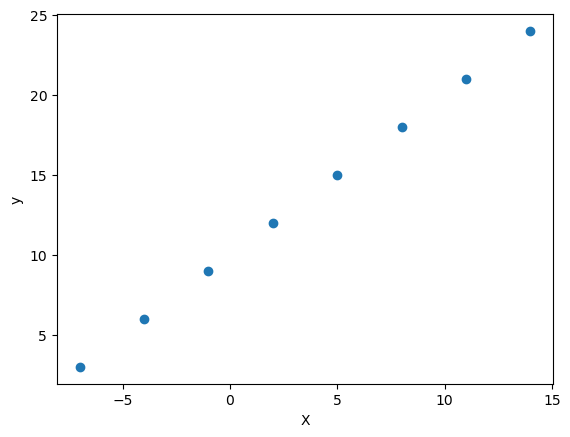

In [2]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize features and labels
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Let's check the input and output shape (Note that these shapes are not correct one)
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [5]:
# Let's check another input and output shape (Note that these shapes are not correct one)
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

As you see above, it seems our inputs and outputs have no shape. Let's turn numpy arrays to tensors for finding correct shape.

In [6]:
# Turn numpy array to tensors
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
# Check tensor shapes
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with Tensorflow

1. **Creating a model** - define input and output layer, as well as the hidden layers of deep learning model.
2. **Compiling  a model** - define the loss function (in other words, the function which tells our model how wrong it is) and optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performanse of our model)
3. **Fitting a model** - letting the model try to find patterns features and labels

In [9]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling a model
model.compile(
    loss=tf.keras.losses.mae, # mae short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD short for stochastic gradient descent
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 216ms/step - loss: 8.6897 - mae: 8.6897
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 8.5572 - mae: 8.5572
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 8.4247 - mae: 8.4247
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 8.2922 - mae: 8.2922
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 8.1597 - mae: 8.1597


In [10]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
# Try to make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 94ms/step


array([[26.389095]], dtype=float32)

Our expection for 17.0 is 27.0 but model prediction is 26.38. This is so bad prediction.

## Improving Model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (called neuron) within each of the hidden layers, change the activation function of each layer
2. **Compiling a model** - Here we might change the optimization function or perhaps the learning rate of the optimization function
3. **Fitting a model** - Here we might change the number of epoch (leave it training for longer) or more data (give the model more example to learn from)

### Increasing number of epoch

In [12]:
# Let's rebuild model (increasing number of epoch)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling a model
model.compile(
    loss=tf.keras.losses.mae, # mae short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD short for stochastic gradient descent
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [13]:
# Remind X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# Let's make a new prediction
model.predict([17.0])

1/1 [==============================] - 0s 55ms/step


array([[29.97533]], dtype=float32)

Our expection is 27 and model prediction is 29.97. This is better and close than before.

### Adding more hidden layers with 100 neuron

In [15]:
# Let's rebuild model

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [16]:
# Let's remind our data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# Making a prediction
model.predict([17.0])

1/1 [==============================] - 0s 70ms/step


array([[31.852669]], dtype=float32)

This prediction is worse than before. The model may have been overfitting.

### Change the optimization function

Our optimization function is Stochastic Gradient Descent, let's make it Adam and see what will happen.

In [18]:
# Let's rebuild model

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [19]:
# Remind data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [20]:
# Making a prediction
model.predict([17.0])

1/1 [==============================] - 0s 70ms/step


array([[30.909225]], dtype=float32)

### Change the learning rate

Learning rate's default parameter is 0.001 for Adam optimizer. Let's make it 0.01

In [21]:
# Let's rebuild model

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [22]:
# Remind the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [24]:
# Make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 38ms/step


array([[28.434526]], dtype=float32)

Woowww.. It's look the best prediction..

### Common ways to improve a deep model

* Adding more hidden layers
* Adding more neurons
* Change the activation function
* Change the optimization function
* Change the learning rate
* Fitting for longer (increase number of epoch)
* Fitting on more data

## Evaluating a model

In practice, a typical workflow  you'll go through when building neural networks is:

```
Build a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it ```

When it comes to evaluation. There are 3 words you memorized:

> 'Visualize, Visualize, Visualize...'

It is a good idea to visualize:
* The data - What data are we working with? What does it look like?
* The model itself - What does model look like?
* Traning of a model - How does a model perform while it learns?
* Prediction of the model -  How do the predictions of a model line up aganist the truth?

In [28]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [29]:
# make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

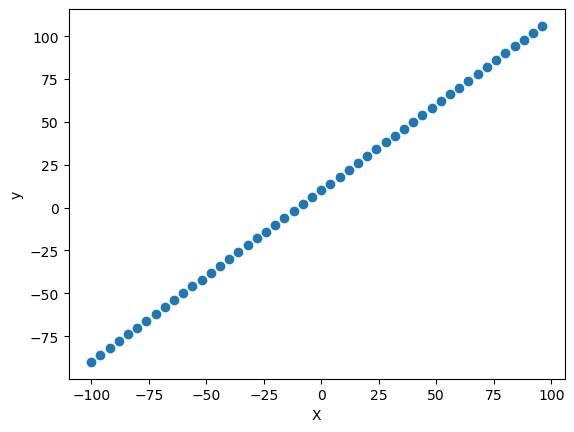

In [27]:
# Plot data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### The three sets

* **Train set** - The model learns from this data, which is typically 70-80% of total data
* **Validation set** - The model gets tuned on this data which is typically 10-15% of total data
* **Test set** - The model gets evaulated on this data to test what is has learned, which is typically 10-15% of total data


In [ ]:
# Check the lenth of how many data we have
len(X)

50

In [30]:
# Split the data into train and test set
X_train = X[:40] # first 40 are train samples (80% of our data)
y_train = y[:40]
            
X_test = X[40:] # last 10 are test samples (20% of our data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing data 

Now we've got our data in train and test sets. Let's visualize it again.

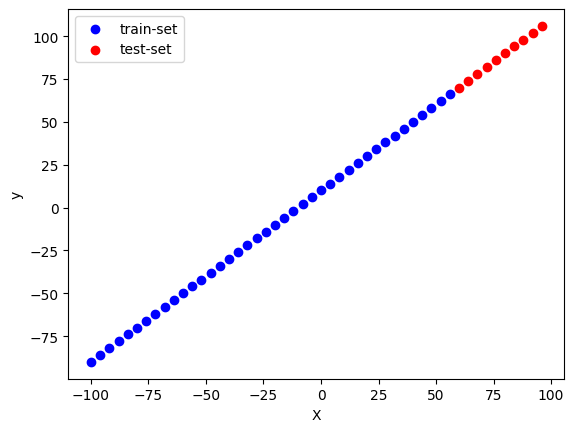

In [ ]:
# plot training data in blue
plt.scatter(X_train, y_train, c='b', label='train-set')
# plot test data in red
plt.scatter(X_test, y_test, c='r', label='test-set')
# show legend
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Visulazing the model


In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above we just add input_shape in Dense)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

# 2. Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 15)                30        
                                                                 
 output_layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


Woww. Its work, now. But, what does it mean?

* **Total params** - Total number of parameters in the model
* **Trainable params** - These are the parameters that model can update as it trains.
* **Non-traianble params** - These are the parameters that model can not update (this is typical when you bring in already learn parameters from other models during transfer learning)

In [ ]:
# Fit the model with training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # verbose=0 means that dont show the progress bar as output

In [ ]:
# Get the summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 15)                30        
                                                                 
 output_layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


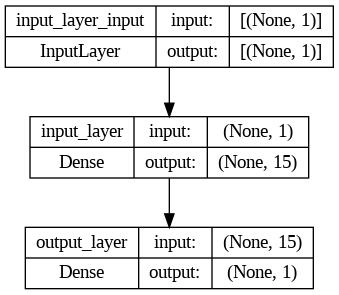

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visulazing our model's predictions

To visualize the predictions, it is good idea to plot them against the truth labels.

We generally call this as `y_preds`, `y_test` and `y_true`

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[ 76.53106 ],
       [ 81.5165  ],
       [ 86.501945],
       [ 91.48739 ],
       [ 96.47283 ],
       [101.458275],
       [106.44372 ],
       [111.42917 ],
       [116.4146  ],
       [121.40005 ]], dtype=float32)

In [ ]:
# Let's create a plotting function
def plot_prediction(train_data=X_train, train_labels=y_train, 
     test_data=X_test, test_labels=y_test, predictions=y_pred):
  
  '''Ploting train data, test data and compare predictions with actual values'''

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', label='Test data')
  # Plot model in red
  plt.scatter(test_data, predictions, c='r', label='Prediction')
  # Show legend and plot
  plt.legend()
  plt.show()

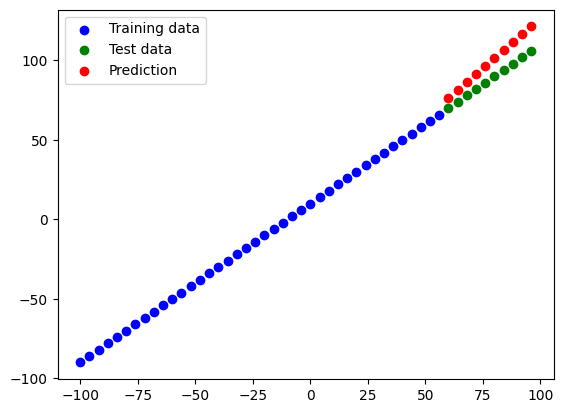

In [ ]:
plot_prediction(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

There are two main metrics for regression problem:
* MAE - mean absolute error, on average, how wrong is each of model's predictions
* MSE - mean square error, 'square the average errors'

In [ ]:
  # Evaluate the model on the test set
  model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 123ms/step - loss: 10.9656 - mae: 10.9656


[10.965551376342773, 10.965551376342773]

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.losses.mean_absolute_error(y_true=y_test, 
                                    y_pred=tf.squeeze(y_pred)) # we used tf.squeeze for y_pred becase shape of y_pred is not same with y_test
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.965553>

In [ ]:
# Calculate the mean square error
mse = tf.keras.losses.mean_squared_error(y_true=y_test, 
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=128.25491>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.mean_absolute_error(y_true, tf.squeeze(y_pred)).numpy()

def mse(y_true, y_pred):
  return tf.keras.losses.mean_squared_error(y_true, tf.squeeze(y_pred)).numpy()

In [ ]:
# MAE and MSE
print(f'Mean Absolute Error (MAE): {mae(y_test, y_pred)}')
print(f'Mean Square Error (MSE): {mse(y_test, y_pred)}')

Mean Absolute Error (MAE): 10.965553283691406
Mean Square Error (MSE): 128.25491333007812


### Running experiments to improve model

``` 
Build a model -> Fit it -> Evaluate it -> Tweak it -> Fit it -> Evaluate it -> tweak it -> Evaluate it
```

1. Get more data - get more examples for your model to train on.
2. Make your model larger (using more complex model) - this might come in the form more layers on more neoron
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 eepochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [31]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
     loss=tf.keras.losses.mae,
     optimizer=tf.keras.optimizers.SGD(),
     metrics=['mae']
)

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 50ms/step


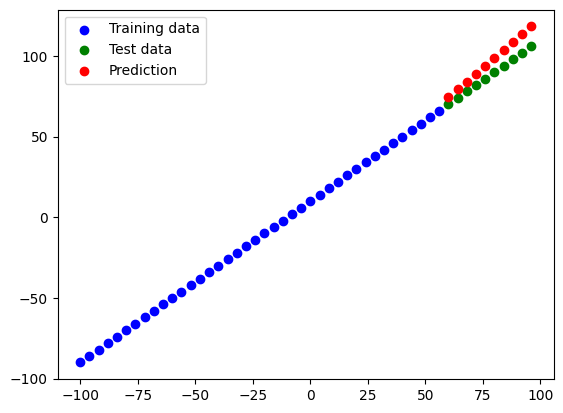

In [ ]:
# Make and plot prediction for model_1
y_pred_1 = model_1.predict(X_test)
plot_prediction(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred_1)

In [ ]:
# Calculate evaluation metrics for model_!
print('Mean Absolute Error (MAE):', mae(y_test, y_pred_1))
print('Mean Square Error (MSE):', mse(y_test, y_pred_1))

Mean Absolute Error (MAE): 8.359485
Mean Square Error (MSE): 76.20581


**Build `model_2`**

* 2 layers, trained for 100 epochs

In [32]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
     loss=tf.keras.losses.mae,
     optimizer=tf.keras.optimizers.SGD(),
     metrics=['mae']
)

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 58ms/step


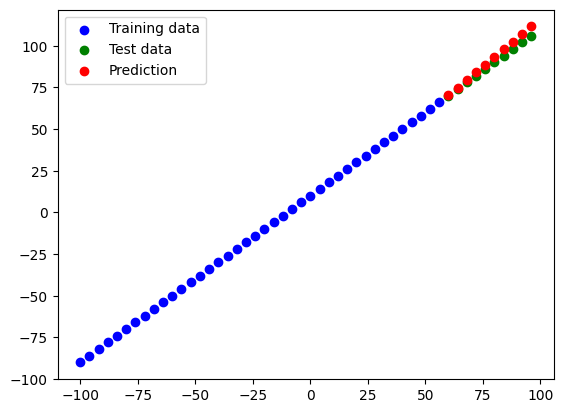

In [ ]:
# Make and plot predictions
y_pred_2 = model_2.predict(X_test)
plot_prediction(predictions=y_pred_2)

In [ ]:
# Calculate evaluation metrics for model_2
print('Mean Absolute Error (MAE):', mae(y_test, y_pred_2))
print('Mean Square Error (MSE):', mse(y_test, y_pred_2))

Mean Absolute Error (MAE): 2.9985268
Mean Square Error (MSE): 11.753682


**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
     loss=tf.keras.losses.mae,
     optimizer=tf.keras.optimizers.SGD(),
     metrics=['mae']
)

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 57ms/step


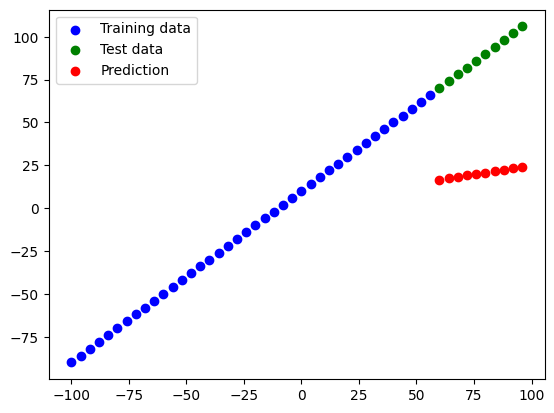

In [ ]:
# Make and plot predictions
y_pred_3 = model_3.predict(X_test)
plot_prediction(predictions=y_pred_3)

In [ ]:
# Calculate evaluation metrics for model_3
print('Mean Absolute Error (MAE):', mae(y_test, y_pred_3))
print('Mean Square Error (MSE):', mse(y_test, y_pred_3))

Mean Absolute Error (MAE): 67.66497
Mean Square Error (MSE): 4662.641


We get very poor predictions for model_3 because we trained to much our model and model overfit.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using pandas DataFrame
import pandas as pd

# model results
model_results = [['model_1', mae(y_test, y_pred_1), mse(y_test, y_pred_1)], 
                 ['model_2', mae(y_test, y_pred_2), mse(y_test, y_pred_2)], 
                 ['model_3', mae(y_test, y_pred_3), mse(y_test, y_pred_3)]]

# Create a dataframe and add results in it
results_df = pd.DataFrame(model_results, columns=['models', 'MAE', 'MSE'])
results_df.head()

,models,MAE,MSE
0,model_1,8.359485,76.205811
1,model_2,2.998527,11.753682
2,model_3,67.664970,4662.641113


Looks like model_2 performed the best.

In [ ]:
 # model summaray
 model_2.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_157 (Dense)           (None, 10)                20        
                                                                 
 dense_158 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Note: One of our main goals should be to minimize the time between our experiments. The more experiments we do, the more things we will figure out which doenst work and in turni get closer to figureing out what does work. 